# מעבדה 2 - ניתוח השפעת פיזור נקודות בקרה על פתרון תצלום


In [1]:
import numpy as np
from numpy.linalg import solve, inv
from matplotlib import pyplot as plt

## שלב 1 - בניית המודל והנתונים 

- *התקינו מחדש את המודול MatrixMethods*
- *במהלך המעבדה נשתמש בקודים ממעבדה קודמת*
- *ניתן לכתוב את הפונקציות ב-Pycharm ולייבא אותן ל-Jupyter במקרה הצורך*

In [2]:
from Camera import Camera
import PhotoViewer as pv
from SingleImage import SingleImage
import MatrixMethods

### חלק א'

מהו המודל שאנחנו רוצים לבדוק?

אוריינטציה חיצונית



נבנה את הנתונים

- מספר נקודות שיתן לבדוק את המודל
     - לפחות שלוש נקודות

- המבנה הפשוט ביותר
    - גם למימוש

- במיקום הנוח ביותר

- הפיזור ש"מרגיש" לנו הכי חסון (יציב גיאומטרית)


In [3]:
from ObjectsSynthetic import *
edgeSize = 10
squere = np.array([[-edgeSize/2,edgeSize/2,0],[edgeSize/2,edgeSize/2,0],[edgeSize/2,-edgeSize/2,0],[-edgeSize/2,-edgeSize/2,0]])

נבחר את פרמטרי המודל

 - נבחר בפרמטרים הנוחים ביותר 
    - מספרים ו/או זוויות שלמים ו"יפים" 

- נתחיל מהמודל הכי פשוט שאפשר
    - תצלום אנכי מעל הראשית
    

In [4]:
# define camera
focal_length = 35
sensor_size = 25
camera1 = Camera(focal_length, np.array([0, 0]), None, None, None, sensor_size)

# define image
omega = 0
phi = 0
kappa = 0
Z = 100
img1 = SingleImage(camera1)
img1.innerOrientationParameters = np.array([0,1,0,0,0,1])
img1.exteriorOrientationParameters = np.array([[0, 0, Z, omega, phi, kappa]])

ציירו את המודל והנתונים במערכת העולם 

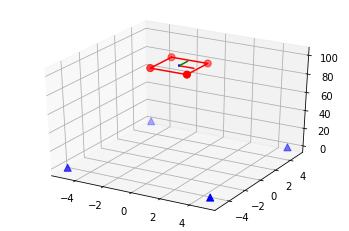

In [5]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
scale = 100
img1.drawSingleImage(squere, scale, ax)
ax.scatter(squere[:,0],squere[:,1],squere[:,2], c='b', s=50,marker='^')

נייצר את הנתונים לאחר ההתמרה

In [6]:
imagePoints1 = img1.GroundToImage(squere)
print(imagePoints1)

[[-1.75  1.75]
 [ 1.75  1.75]
 [ 1.75 -1.75]
 [-1.75 -1.75]]


נבנה את המודל אותו נרצה לבדוק

אוריינטציה חיצונית באמצעות הכלל הקו-לינארי.
הפונקציה נבנתה סמסטר קודם

נוודא שהדגימות והמודל נכונים

 - נפתור את התאום עם הדגימות שיצרנו ונוודא שזהו המודל הנכון


In [7]:
img1.exteriorOrientationParameters, sigma0, sigmaX =  img1.ComputeExteriorOrientation(imagePoints1,squere,0.001)
print(img1.exteriorOrientationParameters)

[array([3.81222441e-27]) array([4.03133185e-27]) array([100.])
 -4.0212788363204164e-29 3.8027177928850787e-29 array([-1.32962161e-33])]


נוסיף רעש מדידה עבור הנקודות המקוריות  

הדגימות נלקחות באופן שרירותי מתוך התפלגות נורמלית 
$$ x, y\sim (\mu, \sigma) $$

-  נוסיף רעש מדידה של 1 ס"מ: $\sigma=0.01$

In [17]:
noiseSize = 0.01
noise = np.random.normal(0, noiseSize, imagePoints1.shape)
imagePoints1 += noise
img1.exteriorOrientationParameters, sigma0, sigmaX =  img1.ComputeExteriorOrientation(imagePoints1,squere,0.001)
print(img1.exteriorOrientationParameters)

[array([12.20383799]) array([-2.9035706]) array([99.28306855])
 0.029185119439333426 0.12186615046244403 array([-0.00329008])]


### חלק ב'

נבדוק את המודל עבור פיזור שונה של נקודות הבקרה
  - כיצד לדעתכם יש לשנות את המודל כך שנקבל פיזור שונה של נקודות הבקרה?

הזזה ושינוי זויות ההרכנה תוך שמירה על הנקודות במסגרת התמונה

הגדירו את פרמטרי המודל 

In [9]:

# define image
omega = 0
phi = np.radians(15)
kappa = 0
Z = 100
img2 = SingleImage(camera1)
img2.innerOrientationParameters = np.array([0,1,0,0,0,1])
img2.exteriorOrientationParameters = np.array([[0, 0, Z, omega, phi, kappa]])

ציירו את המודל והנתונים במערכת העולם 

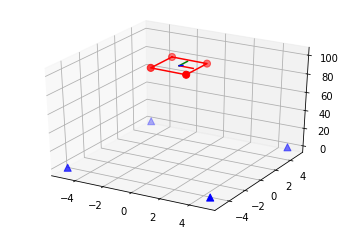

In [10]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
scale = 100
# pv.drawOrientation(img2.RotationMatrix,img2.PerspectiveCenter,1,ax)
# pv.drawImageFrame(sensor_size,sensor_size,img2.RotationMatrix,img2.PerspectiveCenter,camera1.focalLength,1,ax)
img2.drawSingleImage(squere, scale, ax)
ax.scatter(squere[:,0],squere[:,1],squere[:,2], c='b', s=50,marker='^')

נייצר את הנתונים לאחר ההתמרה

In [11]:
imagePoints2 = img2.GroundToImage(squere)
print(imagePoints2)

[[ 7.52737412  1.78778161]
 [11.27933627  1.83633557]
 [11.27933627 -1.83633557]
 [ 7.52737412 -1.78778161]]


נבנה את המודל אותו נרצה לבדוק

In [12]:
#     def ImageToGround_GivenZ(self, imagePoints, Z_values):

נוודא שהדגימות והמודל נכונים

 - נפתור את התאום עם הדגימות שיצרנו ונוודא שזהו המודל הנכון



In [13]:
groundPoints = img2.ImageToGround_GivenZ(imagePoints2,np.zeros(imagePoints2.shape[0]))
print(groundPoints)

[[-5.          5.00000013  0.        ]
 [ 5.          5.00000013  0.        ]
 [ 5.         -5.00000013  0.        ]
 [-5.         -5.00000013  0.        ]]


נוסיף רעש מדידה עבור הנקודות המקוריות  

הדגימות נלקחות באופן שרירותי מתוך מהתפלגות נורמלית 
$$ x, y\sim (\mu, \sigma) $$

-  נוסיף רעש מדידה של 1 ס"מ: $\sigma=0.01$

In [14]:
noiseSize = 0.01
noise = np.random.normal(0, noiseSize, imagePoints2.shape)
imagePoints2 += noise
groundPoints = img1.ImageToGround_GivenZ(imagePoints2,np.zeros(imagePoints2.shape[0]))
print(groundPoints)

[[21.39311718  5.02469633  0.        ]
 [31.93594865  5.120918    0.        ]
 [31.9461161  -5.2767122   0.        ]
 [21.43634673 -5.09808149  0.        ]]


## שלב 2 -  השפעת פיזור נקודות בקרה על פתרון תצלום 

- כמה תצלומים נדרשים על מנת לבדוק את השפעת פיזור הנקודות על הפתרון?
- איך ניתן לייצר מספר תצלומים עם פיזורים שונים של נקודות הבקרה לצורך הבדיקה?
  - מהם הגורימים המשפיעים על שינוי בפיזור נקודות הבקרה בתצלום?
  - תארו את השלבים הנדרשים לבניה?


הגדירו מספר תצלומים (לפחות 8 תצלומים) מסביב לנקודות בקרה שהגדרתם בשלב ראשון

In [15]:
האם צריך הרכנות

SyntaxError: invalid syntax (<ipython-input-15-cd667e77d5bc>, line 1)

חשבו את האוריינטציה חיצונית עבור כל אחד מהתצלומים שיצרתם

In [ ]:
לפני כן צריך לחשב את הדגימות?

ניתוח תוצאות

 - השוו את התוצאות שקיבלתם עם הערכים הידועים
 - הציגו את הדיוק של כל פתרון 

 - האם פיזור שונה של נקודות בקרה בתצלום הוביל לתוצאות שונות?
   - התייחסו לקונפיגורציות שונות

האם קיים הבדל בין תוצאות הפתרון בין תצלום אנכי לתצלום עם אוריינטציה כללית? נמקו